In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from numpy import arange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Преобразуйте данные:y
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [4]:
# часть данных отсутствует
# удаляем пропущенные данные
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [6]:
# потеряли 6 % данных
(11538-10858)/11538

0.05893569076096377

In [7]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [8]:
data['nationality'].unique()

array(['ESP', 'KOR', 'CAN', 'MDA', 'NZL', 'AUS', 'USA', 'ETH', 'BRN',
       'GBR', 'UZB', 'RSA', 'EGY', 'MAR', 'QAT', 'SUD', 'ALG', 'DEN',
       'NED', 'DJI', 'SEN', 'CMR', 'NIG', 'SWE', 'AFG', 'KSA', 'IOA',
       'RUS', 'IND', 'HUN', 'BDI', 'ERI', 'POL', 'BRA', 'GEO', 'CZE',
       'SEY', 'LTU', 'IRI', 'ROU', 'CUB', 'SLO', 'BAH', 'ITA', 'ARG',
       'PUR', 'FRA', 'RWA', 'TOG', 'TUN', 'ISR', 'NGR', 'LAT', 'JOR',
       'MAS', 'LIB', 'IRQ', 'TUR', 'VEN', 'JPN', 'TPE', 'KGZ', 'CHN',
       'MEX', 'GRE', 'IRL', 'KAZ', 'JAM', 'SUI', 'BAR', 'HON', 'ANG',
       'GER', 'COL', 'URU', 'AZE', 'MNE', 'SRB', 'BUL', 'FIN', 'UKR',
       'BLR', 'SMR', 'COK', 'AUT', 'BEL', 'SVK', 'POR', 'KEN', 'ECU',
       'LBA', 'UAE', 'NAM', 'GUY', 'EST', 'SKN', 'ARU', 'PAN', 'PER',
       'FIJ', 'GUI', 'ARM', 'THA', 'SIN', 'TKM', 'CRO', 'BIH', 'TGA',
       'MAW', 'DOM', 'GUA', 'MKD', 'TJK', 'CYP', 'CHI', 'MLT', 'ZIM',
       'TTO', 'TAN', 'CRC', 'BOL', 'BUR', 'ISL', 'HAI', 'ROT', 'MGL',
       'MAD', 'GAB',

In [9]:
print(len(data['nationality'].unique()))
print(len(data['sport'].unique()))

200
27


In [10]:
# оставим в модели  height, weight, sport, gold	, silver, bronze
# id , name - уникальные, преобразовывать 200 национальности в чиловые переменные пока не будем
#selectedColumns = data[['height', 'weight', 'gold', 'silver', 'bronze' ]]
#X = pd.get_dummies(selectedColumns, columns=['sport'])

# пусть целевая переменная будет sex
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]

In [11]:
X.head()

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0


In [12]:
#взяли y
y = data['sex'].map({'male':0, 'female':1}).values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
#Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
predictions = model.predict_proba(X_test)

In [16]:
model.score(X_test, y_test)

0.7753222836095764

In [17]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

In [18]:
# площадь под кривой
from sklearn.metrics import average_precision_score
average_precision_score( y_test, predictions[:, 1] )

0.8347208458901129

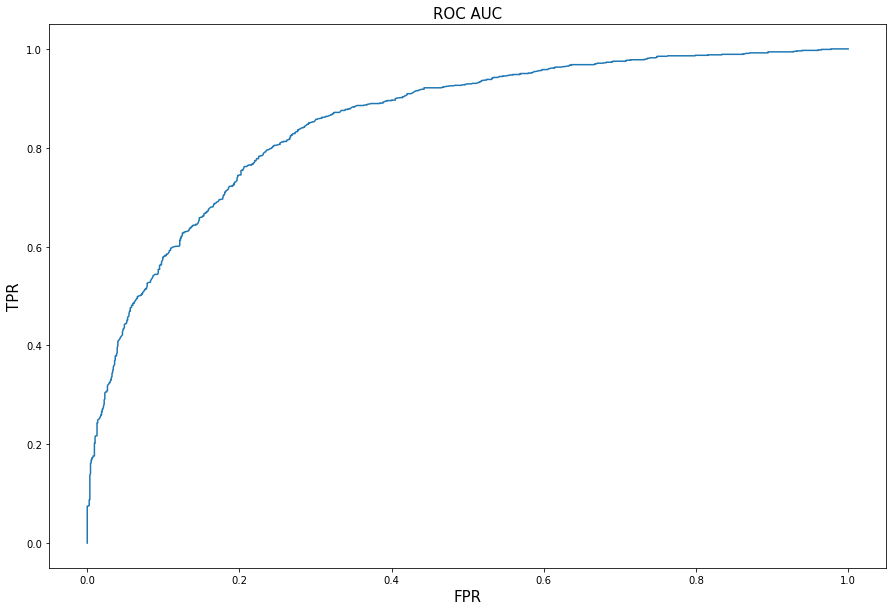

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('FPR', fontdict={'fontsize': 15})
plt.ylabel('TPR', fontdict={'fontsize': 15})
plt.show()

In [20]:
# Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score
roc_auc_score(y_test, predictions[:, 1])

0.8543586783004966

In [21]:
#Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [22]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7753222836095764

In [23]:
thresholds = arange(0, 1, 0.01)
fpr2 = []
tpr2 = []
prs = []
res = []
pr_custom = []
for i in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpra = tp/(tp + fn)
    fpra = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpra #по определению
    fpr2.append(fpra)
    tpr2.append(tpra)
    prs.append(precision)
    res.append(recall)

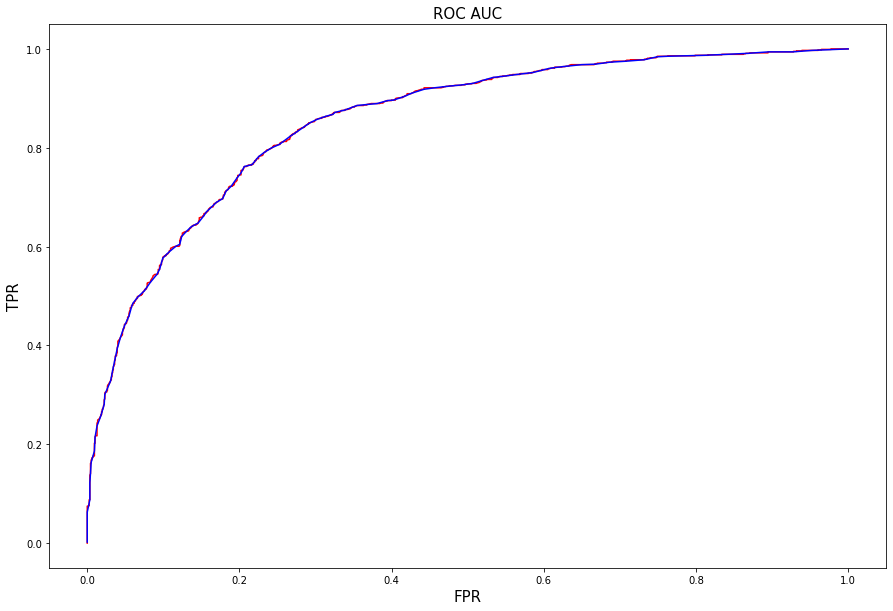

In [24]:
# Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, color="red")
plt.plot(fpr2, tpr2, color="blue")
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('FPR', fontdict={'fontsize': 15})
plt.ylabel('TPR', fontdict={'fontsize': 15})
plt.show()

кривые практически совпадают при большрй детализации (100 измерений ручных)


In [25]:
len (fpr), len (fpr2)

(854, 100)

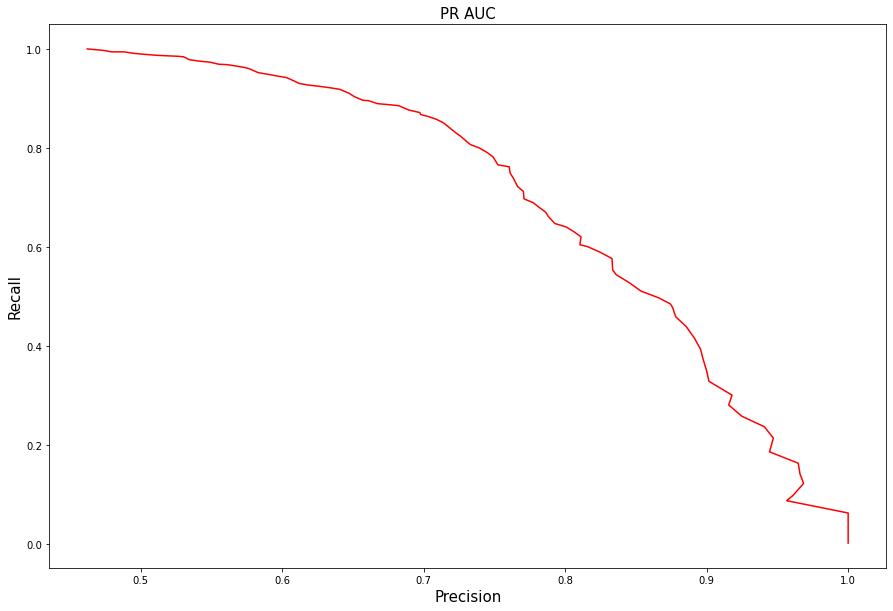

In [26]:
#Постройте график Precision-Recall, используя метрики, посчитанные в п. 5
plt.figure(figsize=(15, 10))
plt.plot(prs, res, color="red")
plt.title('PR AUC', fontdict={'fontsize': 15})
plt.xlabel('Precision', fontdict={'fontsize': 15})
plt.ylabel('Recall', fontdict={'fontsize': 15})
plt.show()

In [27]:
# Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
# считаем площадь под кривой с помощью СУММЫ РИМАНА - суммма прямоугольников 
fpr2 [:10], tpr2[:10]

([1.0,
  0.9529109589041096,
  0.9272260273972602,
  0.8955479452054794,
  0.8681506849315068,
  0.8407534246575342,
  0.8107876712328768,
  0.785958904109589,
  0.7611301369863014,
  0.7491438356164384],
 [1.0,
  0.9970119521912351,
  0.9940239043824701,
  0.9940239043824701,
  0.9910358565737052,
  0.9890438247011952,
  0.9870517928286853,
  0.9860557768924303,
  0.9850597609561753,
  0.9840637450199203])

In [28]:
fpr2.sort()
tpr2.sort()

In [30]:
area = 0
for i in range(0,len(fpr2)-1):
    area = (fpr2[i+1]-fpr2[i])*tpr2[i]+area
area

0.8510563908748567

In [31]:
roc_auc_score(y_test, predictions[:, 1])

0.8543586783004966

a. Качество модели не 0.99 ( не идеально), но все таки 0.85. На таких данных наверное неплохо.
b. если ROC-кривая проходит ниже диагонали , то мы не рассматриваем такие модели, то нужно поменять  0 на 1 в этом алгоритме , а 1 на 0 и он будет зеркально отраженным и похож на те графики, которые мы видим 